import time = 0.0003039836883544922
image time = 0.0637049674987793
time 2 = 8.771360158920288
middle time = 8.772104024887085


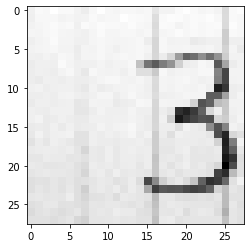

In [3]:
import time
t0 = time.time()

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as img

print('import time =', time.time()-t0)

my_image = img.imread('database/number_photo.jpg', format='jpg')
height, length, color = my_image.shape

my_image = np.array(my_image)

j_start = int(length/2 - height/2)

print('image time =', time.time() - t0)

n = 28

def new_image(my_image):
    # Convert 720 * 1080 rvb image into 28 * 28 black&white
    

    grey_image = np.zeros((height, height), dtype='int32')
    
    for i in range(height):
        for j in range(height):
            sum = 0
            for k in range(3):
                sum += my_image[i][j+j_start][k]
            grey_image[i][j] = 255 - sum//3
            # grey_image[i][j] = 255 - np.mean(pixel)
            
    print('time 2 =', time.time() - t0)
    
    my_new_image = np.zeros((n, n))
    kl_lim = height // (n - 1) - 1
    k_tot = 0
    count = 0
    
    print('middle time =', time.time() - t0)
    
    for i in range(n):
        l_tot = 0
        for j in range(n):
            count += 1
            sum = 0
            k = 0
            l = 0
            
            while k <= kl_lim and k_tot <= height-1:
                while l <= kl_lim and l_tot <= height-1:
                    sum += grey_image[k_tot][l_tot]
                    l += 1
                k += 1
                
            new_pixel = sum / (k + l)
            my_new_image[i][j] = new_pixel
            l_tot += kl_lim
        k_tot += kl_lim
        
    return my_new_image

im28 = new_image(my_image)

plt.imshow(im28, cmap='Greys')


